# ELE 435/535 Homework 4

## Unconstrained Optimization Using Gradient Descent

In this homework, we will examine the minimization of functions using gradient descent. Of particular interest is the convergence rate of the algorithm. We examine this for convex and strongly coinvex functions. We also that the convewrgence rate depends on the characteristics of the problem.

Credits: Adapted from practicals by Francis Bach, Alexandre d'Aspremont, Pierre Gaillard and Aude Genevay.

## Preliminaries 

### Gradient Descent

Let $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ be differentiable with gradient $\nabla f(x)$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:
$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}.
$$

In order to ensure convergence to a local minimum the fixed step size $\gamma$ can't be too big. The standard fixed step size is $\gamma = 1/L$  where $L$ is a uniform upper bound on the largest eigenvlaue of $\nabla^2f(x)$.
    
### Linear Convergence

When the rate of convergence of an optimization algorithm satisfies 

$$
|f(x_t)-f(x^\star)| \leq C \alpha ^t
$$

for some constant $0< \alpha <1$, the error $|f(x_t)-f(x^\star)|$ converges to $0$ exponentially in $t$. By taking logs of both sides you see that 

$$
\log (|f(x_t)-f(x^\star)|)\leq t \log(\alpha) + \log (C).
$$

This is also termed "linear convergence".

### Ridge Regression

We will examine the following quadratic minimization problem: 

$$\min_{x \in \mathbb{R}^n}\  f(x) = \frac{1}{2m}\|y - F x\|^2_2+\frac{\lambda}{2} \|x\|_2^2$$

Here $F \in \mathbb{R}^{m \times n}$ is a given matrix and $y \in \mathbb{R}^m$ is a given vector. The constant $\lambda$ is a hyperparameter that weights the relative importance of the second term versus the first term in $f(x)$. This particular problem is known as **ridge regression**.

We have selected this problem as a testbed since it has a known solution. The optimal $x^\star$ for the ridge regression problem is

$$
x^\star = (F^T F + m\lambda I)^{-1}F^T y.
$$

What we want to explore is the convergence rate of gradient descent to the known solution.

### Before Starting the Computational Exercises

You will need to find: $\nabla f(x)$ and $\nabla^2 f(x)$ for the ridge regression problem. Also consider whether $f(x)$ is strongly convex. If so, determine the maximum value of $c$ for which it is $c$-strongly convex.

ANS: $\nabla f(x) = \left (\frac{1}{m} F^TF + \lambda I_n \right ) x - \frac{1}{m} F^T y$

ANS: $\nabla^2f(x) = \frac{1}{m}F^T F + \lambda I_n$ 

ANS: $f(x)$ is strongly convex since $f(x) -\frac{\lambda}{2}\|x\|_2^2$ is convex. It is hence also strictly convex and convex. To find the largest $c$ for which it is $c$-strongly convex expand $f(x)$ to find the quadratic term. Subtractinhg $\frac{c}{2} x^Tx$ from this term yields
    $$
    x^T \left (\frac{1}{2m} F^TF + \frac{\lambda}{2} I -\frac{c}{2} I\right ) x\ +\ ...
    $$
To ensure the result is convex we need the quadratic term to be PSD. Hence
    $$
    c \leq \lambda + \frac{1}{m} \lambda_{\min}(F^TF).
    $$

# Computational Exercises

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

## 1. Warm-up: A strongly convex versus strictly convex function

### Two scalar functions 

(a) Write a python function to compute and return $f_1(x)=x^2$ and $\nabla f_1(x)$.

(b) Write python function to compute and return $f_2(x)=x^4$ and $\nabla f_2(x)$.

(c) Code a gradient descent algorithm that calls the appropriate functions defined above and computes the minimum of the function. Use a step size $\gamma = 0.1$, a maxiumum of $200$ interations, and stopping criterion $|\nabla f(x)|< \epsilon =10^{-3}$.

(d) Plot $|x_t-x^\star|$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the known solution. To display the convergence speed of the algorithms, plot in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Display convergence plots for both functions on one graph. How and why are the plots different?

In [33]:
# define the objective function x^2
def objfunc1(x):
    return(x**2, 2*x)

In [34]:
# define the function x^4
def objfunc2(x):
    return(x**4, 4*x**3)

In [35]:
# gradient descent algorithm

#f1
step_size = 0.1
iteration = 1
x = np.random.normal()
print(x)
gradient = objfunc1(x)[1]

while iteration < 200 and abs(gradient) > 10^(-3):
    x = x - step_size*(objfunc1(x)[1])
    gradient = objfunc1(x)[1]
    iteration = iteration + 1

final_solution1 = x
print(final_solution1)    
print(objfunc1(final_solution1)[0])    

-0.10145251157592085
-5.262234703579537e-21
2.769111407555682e-41


In [36]:
# gradient descent algorithm

#f2
step_size = 0.1
iteration = 1
x = np.random.normal()
print(x)
gradient = objfunc2(x)[1]

while iteration < 200 and abs(gradient) > 10^(-3):
    x = x - step_size*(objfunc2(x)[1])
    gradient = objfunc1(x)[1]
    iteration = iteration + 1

final_solution2 = x
print(final_solution2)    
print(objfunc2(final_solution2)[0])    

0.19463433302724176
0.0731706848763768
2.866477123606546e-05


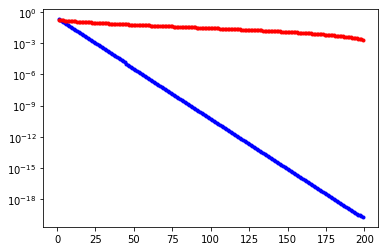

In [37]:
#plot the magnitude difference

#answer 
final_solution1

#f1
step_size = 0.1
iteration = 1
x0 = np.random.normal()
gradient = objfunc1(x0)[1]

x = x0
while iteration < 200 and abs(gradient) >10^(-3):
    x = x - step_size*(objfunc1(x)[1])
    difference = abs(x - final_solution1)
    plt.semilogy(iteration,difference,'b.')
    
    gradient = objfunc1(x)[1]
    iteration = iteration + 1
    
gradient2 = objfunc2(x0)[1]
y = x0
iteration2 = 1

while iteration2 < 200 and abs(gradient2) > 10^(-3):
    y = y - step_size*(objfunc2(y)[1])
    difference2 = abs(y - final_solution2)
    plt.semilogy(iteration2,difference2,'r.')
    gradient2 = objfunc2(y)[1]
    iteration2 = iteration2 + 1 

plt.show()   

In [38]:
print("The plots of both functions are different because f1 (the blue graph) is strongly convex because f'' > 0 for all x, while f2 is only strictly convex, so convergence for f1 is significantly better.")

The plots of both functions are different because f1 (the blue graph) is strongly convex because f'' > 0 for all x, while f2 is only strictly convex, so convergence for f1 is significantly better.


## 2. Ridge Regession

### Step 1: Generate F and y

(a) Generate a random matrix $F \in \mathbb{R}^{m \times n}$ of size $m=50$ and $n=60$ where each row of $F$ belongs to $[0,1]^n$. The numpy cammand `np.random.rand` may be useful. Note that $F$ will have linearly dependent columns. Why?

(b) Model $y$ as $Fx + w$ where $x\in \mathbb{R}^n$ and $w$ is a normally distributed noise vector in $\mathbb{R}^m$. Generate $x \in [0,1]^n$. Then generate a target vector $y \in \mathbb{R}^m$. The numpy command `random.randn` may be useful. 

In [39]:
#generate random matrix F 
m = 50 
n = 60

F = np.zeros((m,n))

for i in range(m):
    F[i,:] = np.random.rand(1,n)
    
print(F.shape)
print(F)

(50, 60)
[[1.60913664e-01 7.37845187e-01 3.73053979e-01 ... 6.99717028e-01
  4.84932191e-01 1.08116199e-01]
 [6.96688531e-02 4.89047413e-01 7.63456066e-01 ... 5.06224005e-01
  8.84839707e-01 9.09643559e-01]
 [2.02529777e-01 5.54414013e-01 1.02900009e-01 ... 6.29179252e-01
  5.74549316e-01 4.41285219e-01]
 ...
 [8.29258863e-01 6.19109779e-01 4.25616838e-01 ... 7.95883817e-01
  2.88422701e-02 4.71871927e-01]
 [3.63748867e-02 5.28192285e-01 1.17164692e-02 ... 9.65749497e-01
  6.19603703e-01 8.83882785e-01]
 [1.56049210e-01 9.37664428e-01 3.74174113e-04 ... 7.38239302e-01
  4.25440158e-01 4.99734077e-01]]


ANS: The number of columns in $F$ is greater than the number of rows. Hence the rank of $F$ is at most the number of rows. So the columns must be linearly depedent.

In [40]:
n = 60 # dimension of x
m = 50  # number of data points
F = F
x = np.random.rand(n,1)
y = np.matmul(F,x)+np.random.randn(m,1)

### Step 2: Numerically compute the solution of ridge regression

(a) Numerically compute the largest eigenvalue and smallest eigenvalue of $\nabla^2 f(x) = P = \frac{1}{m}F^T F + \lambda I$. These will be used to set the constant step size in gradient descent and to bound the rate of convergence.

In addition, compute and display the condition number of the matrix:
$$\frac{\lambda_{\max}(P)}{\lambda_{\min}(P)}.$$
A very large condition number is a warning of a lack of numerical robustness. Investigate what happens for small $\lambda$ values (say, $\lambda=0.01$). Report your observations and interpretation below.

(b) Now compute $x^\star$ and $f(x^\star)$ numerically. It's good practice to avoid computing a matrix inverse. Instead solve a set of linear equations. See the numpy command `linalg.solve`.

ANS: 

In [41]:
# gradient descent 
#new matrix

#regularization parameter (lambda)
reg = 1.0

P = (1/m)*np.matmul(F.transpose(),F)+reg*np.identity(n)

from numpy import linalg as LA
w, v = LA.eig(P)

lambda_max = np.amax(w)
lambda_min = np.amin(w)

#condition number
condition_number = lambda_max/lambda_min
print(condition_number)

print("\nSmall values of lambda results in very large values for the condition number (for instance, 0.01 gives us a condition number around 1,500). Thus, small regulation numbers result in a greater lack of numerical robustness and will be harder for convergence in the algorithm.")

16.122493318509996

Small values of lambda results in very large values for the condition number (for instance, 0.01 gives us a condition number around 1,500). Thus, small regulation numbers result in a greater lack of numerical robustness and will be harder for convergence in the algorithm.


In [42]:
M = np.matmul(F.transpose(),F)+m*reg*np.identity(n)
N = np.matmul(F.transpose(),y)
x_optimal = np.linalg.solve(M,N)

print(x_optimal)

#compute f(x)
f = 1/(2*m)*(np.linalg.norm(y - np.dot(F,x_optimal))**2 + (reg/2)*np.linalg.norm(x_optimal))**2
print('\n')
print(f)

[[0.58816695]
 [0.44396104]
 [0.58922113]
 [0.53643962]
 [0.51417072]
 [0.51545445]
 [0.6178244 ]
 [0.36270552]
 [0.54958271]
 [0.59244361]
 [0.4905956 ]
 [0.46370824]
 [0.47820856]
 [0.49466991]
 [0.47233805]
 [0.51510378]
 [0.442617  ]
 [0.46626387]
 [0.55802331]
 [0.53242217]
 [0.54075501]
 [0.59177246]
 [0.65326153]
 [0.50723265]
 [0.49613284]
 [0.55533111]
 [0.54043036]
 [0.46656002]
 [0.48718806]
 [0.50163158]
 [0.47440591]
 [0.50990178]
 [0.56075409]
 [0.42262963]
 [0.44044002]
 [0.52365479]
 [0.53701039]
 [0.47487945]
 [0.4132228 ]
 [0.53794897]
 [0.6181041 ]
 [0.56993524]
 [0.5333991 ]
 [0.53054146]
 [0.51302591]
 [0.48628979]
 [0.43726223]
 [0.65685089]
 [0.65198143]
 [0.51305446]
 [0.48685233]
 [0.46656224]
 [0.44963641]
 [0.54482446]
 [0.49077959]
 [0.51277801]
 [0.51736107]
 [0.58494459]
 [0.55215794]
 [0.51056   ]]


136.57985556689044


### Step 3: Solve ridge regression using gradient descent

Now that we know the solution $x^\star$ and the largest and smallest eigenvalues of $P$ and we can explore the convergence of gradient descent with both constant stepsize and variable step size.

(a) Put your code from the above steps together into one new code block to implement gradient descent using the standard constant step-size to numerically find the vector $x_*$ that minimizes the ridge regression function and the minimum value of the function. 

* Use $\lambda = 1.0$.

* Stopping criterion: $\|\nabla f(x)\|_2 < \epsilon = 10^{-3}$. The numpy command `linalg.norm` may be useful. 

* Set the constant step size $\gamma$ using largest eigenvalue of $\nabla^2f(x)$. 

(b) Display your results by plotting $\|x_t-x^\star\|_2$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the pre-computed ridge regression solution. The convergence speed of algorithms is displayed by plotting in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Your plot should be a straight line.

(c) Now add to your code an implementation of gradient descent using the optimal variable step size (for quadratic functions) to find the minimum and minmum value of the ridge regression function. Use the same paramters as in partt (a).
To aid comparison, plot your convergence results on the same graph produced in part (b).

(d) Finally add these two bounds to your plot: 

(i) constant step bound: $e^{-2\lambda_{\max}(P) \gamma t}$ and 

(ii) optimal step bound: $e^{-2\lambda_{\max}(P) \sum_{i=1}^t \gamma_i}$. 

These bounds are derived from the gradient flow approximation and are valid when the step sizes are small (See HW 4 Theory).


In [43]:
# Your code to specify n, m, and select F and y

n = 60 # dimension of x
m = 50  # number of data points
F = np.zeros((m,n))
for i in range(m):
    F[i,:] = np.random.rand(1,n)
y = np.matmul(F,x)+np.random.randn(m,1)

reg = 1.0
P = (1/m)*np.matmul(F.transpose(),F)+reg*np.identity(n)

from numpy import linalg as LA
w, v = LA.eig(P)

lambda_max = np.amax(w)
lambda_min = np.amin(w)

In [44]:
#define function 
def minfunction(x):
    f = 1/(2*m)*(np.linalg.norm(y - np.matmul(F,x))**2 + reg/2*np.linalg.norm(x))**2
    grad_f = np.matmul(((1/m)*np.matmul(F.transpose(), F)+reg*np.identity(n)),x) - 1/m*np.matmul(F.transpose(),y)
    return(f, grad_f)

In [45]:
# Gradient Descent
grad_f2 = 1/m*np.matmul(F.transpose(),F) + reg*np.identity(n)

from numpy import linalg as LA
w_new, v_new = LA.eig(grad_f2)

lambda_max_new = np.amax(w_new)
step_size = 1/lambda_max_new

iteration_new = 1
x0 = np.random.rand(n,1)
gradient_function = minfunction(x0)[1]

x = x0

while np.linalg.norm(gradient_function) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    gradient_function = minfunction(x)[1]
    iteration_new = iteration_new + 1

optimal_solution = x

print(optimal_solution)  
print('\n')
print(minfunction(optimal_solution)[0])   

[[0.53892784]
 [0.4104063 ]
 [0.34950561]
 [0.52417391]
 [0.55867575]
 [0.56884147]
 [0.55447714]
 [0.53109982]
 [0.6311513 ]
 [0.4614477 ]
 [0.5345246 ]
 [0.49930581]
 [0.49460447]
 [0.41571867]
 [0.5459847 ]
 [0.51132147]
 [0.41578167]
 [0.5517306 ]
 [0.51302038]
 [0.43286456]
 [0.55836321]
 [0.51316423]
 [0.46542723]
 [0.48798944]
 [0.65154943]
 [0.54567316]
 [0.56767167]
 [0.47521074]
 [0.52078682]
 [0.49565572]
 [0.45389913]
 [0.47461191]
 [0.4376541 ]
 [0.48763965]
 [0.5046768 ]
 [0.59593165]
 [0.47142399]
 [0.53068347]
 [0.5491563 ]
 [0.65889803]
 [0.53175673]
 [0.48805693]
 [0.59920699]
 [0.56105499]
 [0.40162297]
 [0.4357948 ]
 [0.58532812]
 [0.67562766]
 [0.59996559]
 [0.4988818 ]
 [0.48295143]
 [0.50249546]
 [0.50916334]
 [0.47371899]
 [0.48459259]
 [0.59662801]
 [0.41567964]
 [0.53753579]
 [0.54193976]
 [0.61899872]]


153.04534416377808


In [46]:
iteration_new = 1
x0 = np.random.rand(n,1)
gradient_function = minfunction(x0)[1]

x = x0
#step_size = gTg/gTPg
step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)

while np.linalg.norm(gradient_function) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    gradient_function = minfunction(x)[1]
    iteration_new = iteration_new + 1
    step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)

optimal_solution2 = x

print(optimal_solution2)  
print('\n')
print(minfunction(optimal_solution2)[0]) 

[[0.53877343]
 [0.41031112]
 [0.34943686]
 [0.52422441]
 [0.55859449]
 [0.56904704]
 [0.55458537]
 [0.53088386]
 [0.63130588]
 [0.46165219]
 [0.53472445]
 [0.49946663]
 [0.4944832 ]
 [0.41590279]
 [0.5459544 ]
 [0.51148442]
 [0.41560282]
 [0.55167714]
 [0.51298841]
 [0.43279808]
 [0.5585802 ]
 [0.51293005]
 [0.46537642]
 [0.48807763]
 [0.65156533]
 [0.54577279]
 [0.5676305 ]
 [0.47525043]
 [0.52054396]
 [0.49573319]
 [0.45400094]
 [0.47454445]
 [0.43776827]
 [0.48757354]
 [0.50442837]
 [0.59571147]
 [0.47164473]
 [0.53076534]
 [0.54912547]
 [0.65903911]
 [0.53194158]
 [0.48816856]
 [0.59913998]
 [0.56108362]
 [0.40169843]
 [0.43575844]
 [0.58533137]
 [0.67580926]
 [0.60006489]
 [0.49888725]
 [0.48298288]
 [0.50221181]
 [0.5091358 ]
 [0.47353649]
 [0.48445166]
 [0.59665078]
 [0.4155251 ]
 [0.53761365]
 [0.54156431]
 [0.61916464]]


153.01397888732302


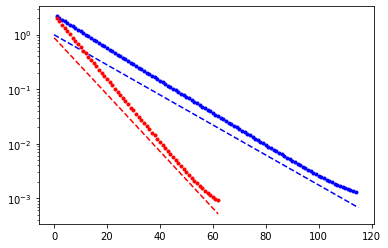

In [47]:
iteration_graph = 1
x_new = np.random.rand(n,1)
gradient_function_new = minfunction(x_new)[1]

x = x_new
from numpy import linalg as LA
w_new, v_new = LA.eig(grad_f2)

lambda_max_new = np.amax(w_new)
step_size = 1/lambda_max_new

while np.linalg.norm(gradient_function_new) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    difference_graph = np.linalg.norm(x - optimal_solution)
    plt.semilogy(iteration_graph,difference_graph,'b.')
    
    gradient_function_new = minfunction(x)[1]
    iteration_graph = iteration_graph + 1
index_array = np.arange(iteration_graph+1)
bound_array = np.exp(-lambda_min*step_size*index_array)
plt.plot(index_array,bound_array, 'b--')
    
    
x = x_new
gradient_function = minfunction(x_new)[1]
iteration_new = 1
step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
sum_step = step_size
sum_step_array = [sum_step]
while np.linalg.norm(gradient_function) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    difference_graph = np.linalg.norm(x - optimal_solution2)
    plt.semilogy(iteration_new,difference_graph,'r.')
    
    gradient_function = minfunction(x)[1]
    iteration_new = iteration_new + 1
    step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
    sum_step = sum_step + step_size
    sum_step_array = np.append(sum_step_array,[sum_step])
    
index_array2 = np.arange(iteration_new)
bound_array2 = np.exp(-lambda_min*sum_step_array)

plt.plot(index_array2,bound_array2, 'r--')
plt.show()

### Part 4: Investigate the effect of changing $\lambda$
    
(a) Display the convergence plots for various values of $\lambda$. First use a fixed step size; then use a optimal step size and compare the results. You can use four values $\lambda \in [1.0,4.0]$. Explain why the convergence rates are changing with $\lambda$. 

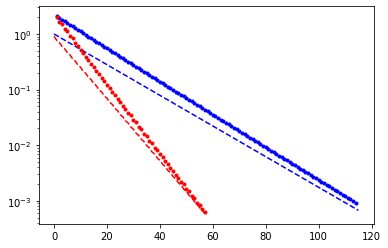

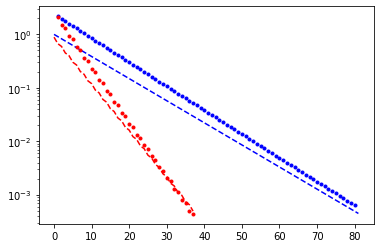

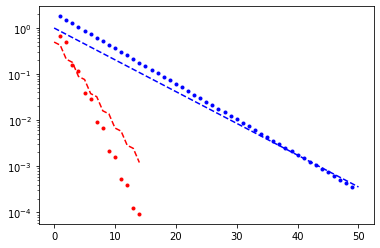

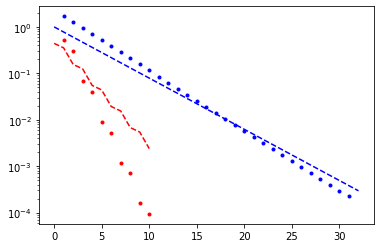

In [48]:
lambdas = np.array([1.0, 1.5, 2.5, 4.0])
from numpy import linalg as LA

for i in range(4):
    reg = lambdas[i]
    
    P = (1/m)*np.matmul(F.transpose(),F)+reg*np.identity(n)
    w, v = LA.eig(P)

    lambda_max = np.amax(w)
    lambda_min = np.amin(w)

    # value
    M = np.matmul(F.transpose(),F)+m*reg*np.identity(n)
    N = np.matmul(F.transpose(),y)
    x_optimal = np.linalg.solve(M,N)


    iteration_graph = 1
    x_new = np.random.rand(n,1)
    gradient_function_new = minfunction(x_new)[1]

    x = x_new
    from numpy import linalg as LA
    w_new, v_new = LA.eig(grad_f2)

    lambda_max_new = np.amax(w_new)
    step_size = 1/lambda_max_new

    while np.linalg.norm(gradient_function_new) > 1.0e-3:
        x = x - step_size*(minfunction(x)[1])
        difference_graph = np.linalg.norm(x - x_optimal)
        plt.semilogy(iteration_graph,difference_graph,'b.')

        gradient_function_new = minfunction(x)[1]
        iteration_graph = iteration_graph + 1
    index_array = np.arange(iteration_graph+1)
    bound_array = np.exp(-lambda_min*step_size*index_array)
    plt.plot(index_array,bound_array, 'b--')


    x = x_new
    gradient_function = minfunction(x_new)[1]
    iteration_new = 1
    step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
    sum_step = step_size
    sum_step_array = [sum_step]
    while np.linalg.norm(gradient_function) > 1.0e-3:
        x = x - step_size*(minfunction(x)[1])
        difference_graph = np.linalg.norm(x - x_optimal)
        plt.semilogy(iteration_new,difference_graph,'r.')

        gradient_function = minfunction(x)[1]
        iteration_new = iteration_new + 1
        step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
        sum_step = sum_step + step_size
        sum_step_array = np.append(sum_step_array,[sum_step])

    index_array2 = np.arange(iteration_new)
    bound_array2 = np.exp(-lambda_min*sum_step_array)

    plt.plot(index_array2,bound_array2, 'r--')
    plt.show()

In [49]:
print("The convergence rates are changing with lambda because larger lambdas place a larger emphasis on the norm(x) term of the Ridge Regression function; thus for larger values of lambda, convergence is faster because we are minimizing mainly x (the quadratic term) and the function gets more strongly convex")

The convergence rates are changing with lambda because larger lambdas place a larger emphasis on the norm(x) term of the Ridge Regression function; thus for larger values of lambda, convergence is faster because we are minimizing mainly x (the quadratic term) and the function gets more strongly convex


### Part 5: Small Values of lambda

(a) In terms of convexity, what happens to the ridge regression function when $\lambda \rightarrow 0$? 

(b) Since $F^TF$ is singular, when we select $\lambda$ to be very small, some of the eigenvalues of $P$ become close to zero while the largest eigenvlaues of $P$ remain little changed. As a result the level sets of the quadratic function become elongated and narrow. The gradient is always orthogonal to the level sets. This can result in making slow progress in minimizing $f$. 

Check this by plotting the convergence curves for both the standard constant step and the optimal step size on the same graph. Use $\lambda=0.1$. On the same graph plot the constant step bound and optimal step bound defined previously.

ANS: (a) The regularization parameter $\lambda$ changes the quadratic term in the function. As $\lambda$ gets larger, the function gets more strongly convex; as $\lambda$ gets small it is less strongly convex. If $F$ has linearly dependent columns, $\lambda_{\min}(P)$ will converege to $0$ as $\lambda \rightarrow 0$.

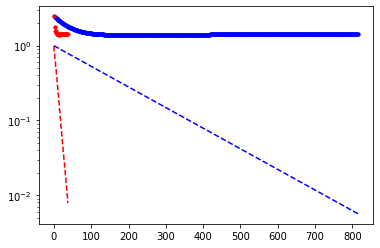

In [50]:
reg = 0.1

P = (1/m)*np.matmul(F.transpose(),F)+reg*np.identity(n)
w, v = LA.eig(P)

lambda_max = np.amax(w)
lambda_min = np.amin(w)

# value
M = np.matmul(F.transpose(),F)+m*reg*np.identity(n)
N = np.matmul(F.transpose(),y)
x_optimal = np.linalg.solve(M,N)

iteration_graph = 1
x_new = np.random.rand(n,1)
gradient_function_new = minfunction(x_new)[1]

x = x_new
from numpy import linalg as LA
w_new, v_new = LA.eig(grad_f2)

lambda_max_new = np.amax(w_new)
step_size = 1/lambda_max_new

while np.linalg.norm(gradient_function_new) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    difference_graph = np.linalg.norm(x - optimal_solution)
    plt.semilogy(iteration_graph,difference_graph,'b.')
    
    gradient_function_new = minfunction(x)[1]
    iteration_graph = iteration_graph + 1
index_array = np.arange(iteration_graph+1)
bound_array = np.exp(-lambda_min*step_size*index_array)
plt.plot(index_array,bound_array, 'b--')
    
    
x = x_new
gradient_function = minfunction(x_new)[1]
iteration_new = 1
step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
sum_step = step_size
sum_step_array = [sum_step]
while np.linalg.norm(gradient_function) > 1.0e-3:
    x = x - step_size*(minfunction(x)[1])
    difference_graph = np.linalg.norm(x - optimal_solution2)
    plt.semilogy(iteration_new,difference_graph,'r.')
    
    gradient_function = minfunction(x)[1]
    iteration_new = iteration_new + 1
    step_size = np.matmul(gradient_function.transpose(),gradient_function)/np.matmul(np.matmul(gradient_function.transpose(),P),gradient_function)
    sum_step = sum_step + step_size
    sum_step_array = np.append(sum_step_array,[sum_step])
    
index_array2 = np.arange(iteration_new)
bound_array2 = np.exp(-lambda_min*sum_step_array)

plt.plot(index_array2,bound_array2, 'r--')
plt.show()
